In [1]:
import pandas as pd
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/ancova_data.csv")
df.head(4)

,genotype,height,yield
0,A,10.0,20.0
1,A,11.5,22.0
2,A,12.0,24.0
3,A,12.9,24.0


In [2]:
%pip install dfply
from dfply import *
# summary statistics for dependent variable yield
df >> group_by(X.genotype) >> summarize(n=X['yield'].count(), mean=X['yield'].mean(), std=X['yield'].std())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 3.3 MB/s eta 0:00:00


,genotype,n,mean,std
0,A,10,25.17,2.577704
1,B,10,35.45,2.431849
2,C,10,17.73,2.039635


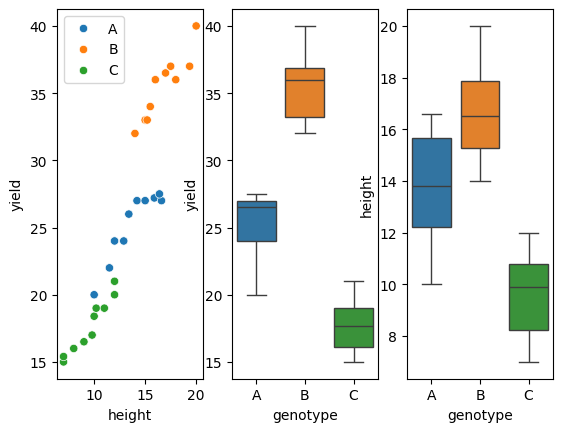

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df, x="height", y="yield", hue=df.genotype.tolist(), ax=axs[0])
sns.boxplot(data=df, x="genotype", y="yield", hue=df.genotype.tolist(), ax=axs[1])
sns.boxplot(data=df, x="genotype", y="height", hue=df.genotype.tolist(), ax=axs[2])
plt.show()

In [4]:
%pip install pingouin
from pingouin import ancova
ancova(data=df, dv='yield', covar='height', between='genotype')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.7 MB/s eta 0:00:00


,Source,SS,DF,F,p-unc,np2
0,genotype,193.232458,2,141.352709,1.072947e-14,0.915777
1,height,132.695696,1,194.138152,1.429323e-13,0.881892
2,Residual,17.771304,26,NaN,NaN,NaN


In [5]:
import numpy as np
import pandas as pd

# create data
data = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})
# view data
data

,methodology,current_grade,test_score
0,A,67,77
1,A,88,89
2,A,75,74
3,A,85,69
4,B,92,88
5,B,77,93
6,B,74,94
7,B,88,90
8,C,91,85
9,C,88,81


In [ ]:
from pingouin import ancova

data = pd.DataFrame({'methodology': np.repeat(['A', 'B', 'C'], 4),
                     'current_grade': [67, 88, 75, 85,
                                       92, 77, 74, 88,
                                       91, 88, 82, 80],
                     'test_score': [77, 89, 74, 69,
                                    88, 93, 94, 90,
                                    85, 81, 83, 79]})

ancova(data=data, dv='test_score', covar='current_grade', between='methodology')

In [ ]:
#ancova using statsmodels
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the data for the ANCOVA
df = pd.DataFrame({'dependent_variable' : [8, 7, 9, 11, 10, 12, 14, 13, 15, 16],
   'group' : ["A", "A", "A", "B", "B", "B", "C", "C", "C", "C"],
    'covariate' : [20, 30, 40, 30, 40, 50, 40, 50, 60, 70]})

# Perform the ANCOVA
model = ols('dependent_variable ~ group + covariate', data=df).fit()

# Print the summary of the model
print(model.summary())

In [6]:
#a more detailed example:
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(123)

# Generate age data
age_treatment = np.random.normal(loc=40, scale=10, size=50)
age_control = np.random.normal(loc=40, scale=10, size=50)

# Generate body weight data
baseline_weight_treatment = np.random.normal(loc=80, scale=10, size=50)
baseline_weight_control = np.random.normal(loc=80, scale=10, size=50)
post_weight_treatment = np.random.normal(loc=75, scale=10, size=50)
post_weight_control = np.random.normal(loc=80, scale=10, size=50)

# Combine data into a DataFrame
df = pd.DataFrame({
    'age': np.concatenate((age_treatment, age_control)),
    'baseline_weight': np.concatenate((baseline_weight_treatment, baseline_weight_control)),
    'post_weight': np.concatenate((post_weight_treatment, post_weight_control)),
    'treatment': np.concatenate((np.ones(50), np.zeros(50)))
})

In [8]:
# Fit ANCOVA model
model = sm.formula.ols('post_weight ~ treatment + age + baseline_weight', data=df).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            post_weight   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     2.693
Date:                Sat, 23 Mar 2024   Prob (F-statistic):             0.0504
Time:                        16:47:06   Log-Likelihood:                -368.80
No. Observations:                 100   AIC:                             745.6
Df Residuals:                      96   BIC:                             756.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          79.2683      8.971     

In [7]:
# Fit ANCOVA model with interaction term
model_interaction = sm.formula.ols('post_weight ~ treatment * age + baseline_weight', data=df).fit()

# Print model summary
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:            post_weight   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.999
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.101
Time:                        16:47:05   Log-Likelihood:                -368.80
No. Observations:                 100   AIC:                             747.6
Df Residuals:                      95   BIC:                             760.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          79.1006      9.736     